Distinct Bookings: 339
Distinct Sessions: 331
Distinct Searches: 1360
Sessions with more than one booking: 10


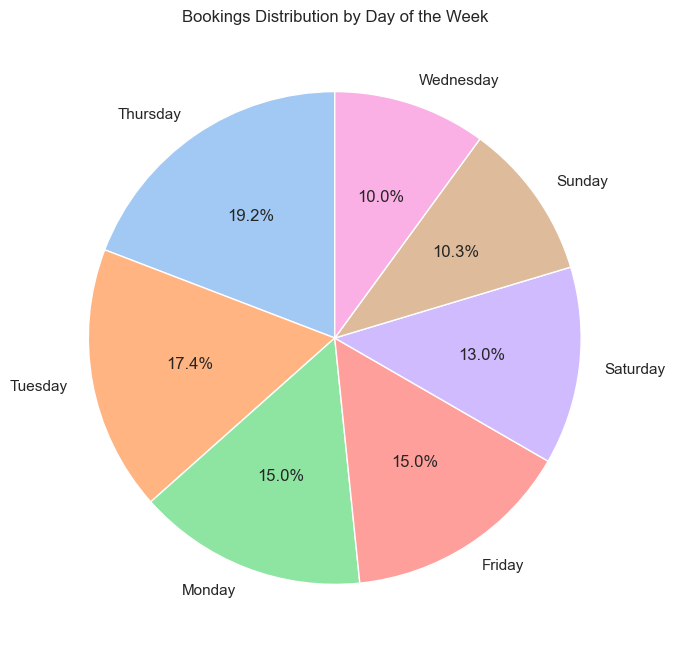

              Total Bookings  Total GBV (INR)
service_name                                 
GOIBIBO                  186       5897637.97
MMT                       48        665669.08
YATRA                    105       3378702.13
Most booked route: ('Gurgaon', 'Roissy-en-France')
from_city
Bālāpur       46.166667
Devanhalli    29.583333
Gurgaon       27.175573
Name: days_to_departure, dtype: float64


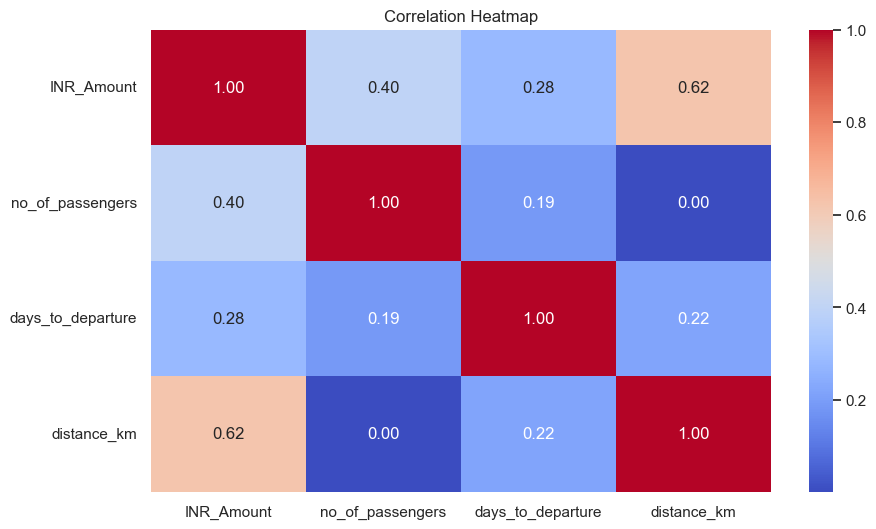

service_name
GOIBIBO        IOS
MMT        Desktop
YATRA      Desktop
Name: device_type_used, dtype: object


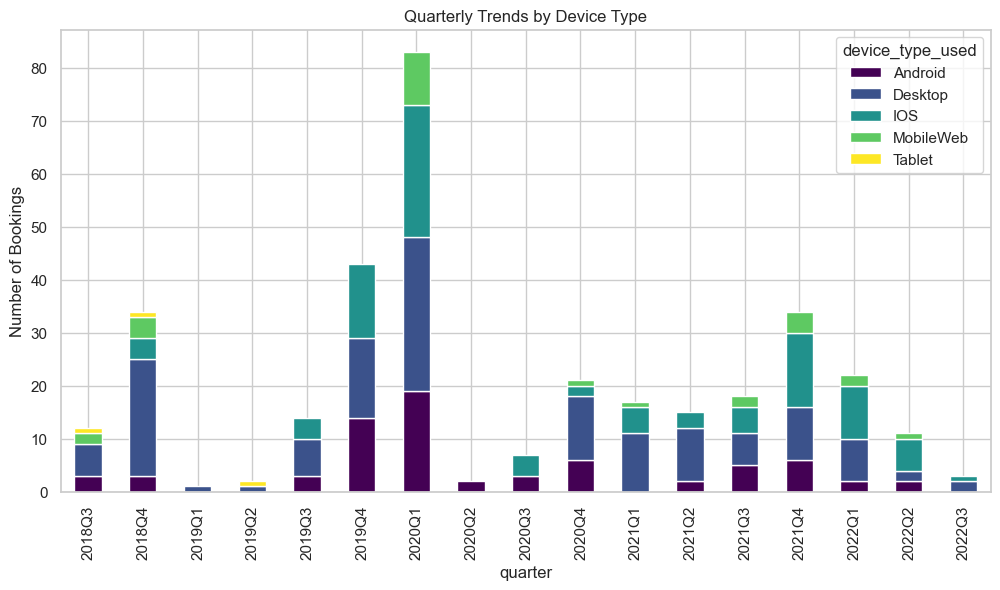

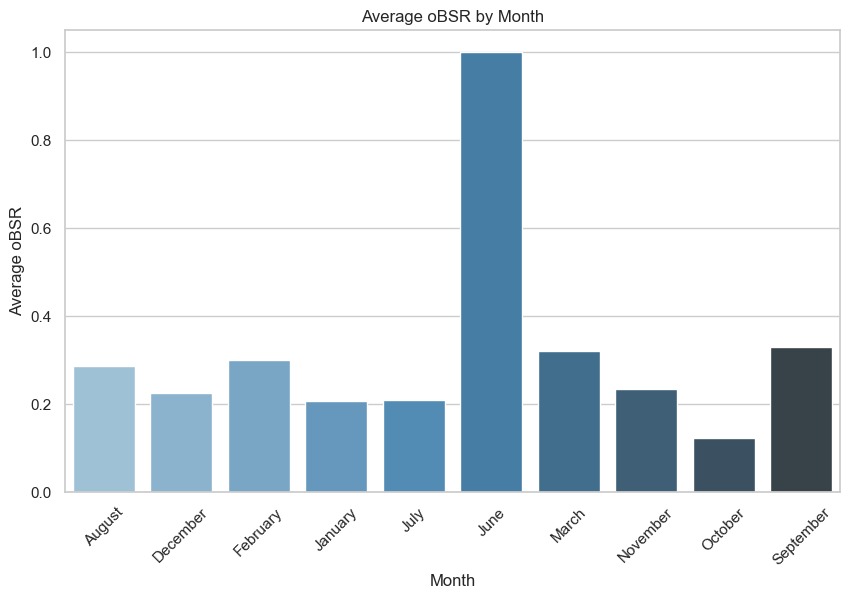

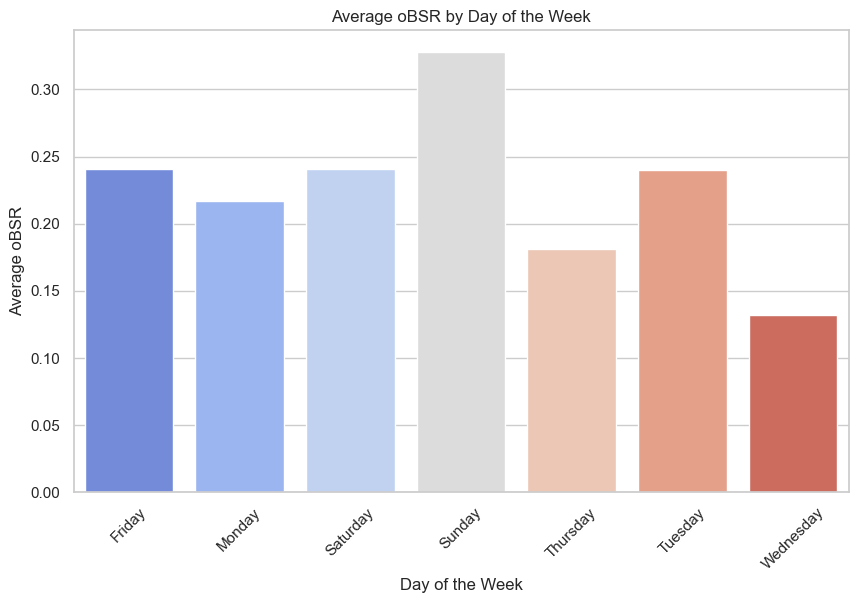

Average oBSR by Month:
           obsr_month
month                
August       0.285714
December     0.222930
February     0.298507
January      0.205882
July         0.208333
June         1.000000
March        0.319149
November     0.233766
October      0.120968
September    0.327586
Average oBSR by Day of the Week:
             obsr_day
day_of_week          
Friday       0.240876
Monday       0.217105
Saturday     0.240876
Sunday       0.327586
Thursday     0.180851
Tuesday      0.239726
Wednesday    0.132075


In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
bookings = pd.read_csv(r"C:\Users\15sdu3074tx\OneDrive\Desktop\Projects_Edureka\Dataset\datasets\Datasets\Bookings.csv")
sessions = pd.read_csv(r"C:\Users\15sdu3074tx\OneDrive\Desktop\Projects_Edureka\Dataset\datasets\Datasets\Sessions.csv")

# Task 1: Distinct counts
num_bookings = bookings['booking_id'].nunique()
num_sessions = sessions['session_id'].nunique()
num_searches = sessions['search_id'].nunique()

print(f"Distinct Bookings: {num_bookings}")
print(f"Distinct Sessions: {num_sessions}")
print(f"Distinct Searches: {num_searches}")

# Task 2: Sessions with more than one booking
bookings_per_session = sessions.groupby('session_id')['booking_id'].nunique()
sessions_with_multiple_bookings = bookings_per_session[bookings_per_session > 1].count()
print(f"Sessions with more than one booking: {sessions_with_multiple_bookings}")

# Task 3: Bookings by day of the week
bookings['booking_time'] = pd.to_datetime(bookings['booking_time'])
bookings['day_of_week'] = bookings['booking_time'].dt.day_name()

bookings_by_day = bookings['day_of_week'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 8))
bookings_by_day.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title("Bookings Distribution by Day of the Week")
plt.ylabel("")
plt.savefig("bookings_by_day_pie_chart.png")
plt.show()

# Task 4: Total bookings and GBV per service
total_bookings_gbv = bookings.groupby('service_name').agg({
    'booking_id': 'count',
    'INR_Amount': 'sum'
}).rename(columns={'booking_id': 'Total Bookings', 'INR_Amount': 'Total GBV (INR)'})

print(total_bookings_gbv)

# Task 5: Most booked route for customers with multiple bookings
multiple_bookings_customers = bookings.groupby('customer_id')['booking_id'].nunique()
multiple_booking_customers_ids = multiple_bookings_customers[multiple_bookings_customers > 1].index

most_booked_routes = bookings[bookings['customer_id'].isin(multiple_booking_customers_ids)]
most_booked_route = most_booked_routes.groupby(['from_city', 'to_city']).size().idxmax()
print(f"Most booked route: {most_booked_route}")

# Task 6: Top 3 departure cities for advance bookings
top_departure_cities = bookings[bookings['days_to_departure'] > 0]
top_departure_cities = top_departure_cities.groupby('from_city').filter(lambda x: len(x) >= 5)
top_departure_cities_agg = top_departure_cities.groupby('from_city')['days_to_departure'].mean().nlargest(3)

print(top_departure_cities_agg)

# Task 7: Correlation heatmap
# Select only numeric columns for correlation
numeric_columns = bookings.select_dtypes(include=['number']).columns
correlation = bookings[numeric_columns].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt='.2f')
plt.title("Correlation Heatmap")
plt.savefig("correlation_heatmap.png")
plt.show()

# Task 8: Most used device type per service
device_type_per_service = bookings.groupby('service_name')['device_type_used'].agg(lambda x: x.mode()[0])
print(device_type_per_service)

# Task 9: Quarterly trends by device type
bookings['booking_time'] = pd.to_datetime(bookings['booking_time'], errors='coerce')

# Strip timezone information if it exists before converting to Period
bookings['booking_time'] = bookings['booking_time'].dt.tz_localize(None)  # Remove timezone info

bookings['quarter'] = bookings['booking_time'].dt.to_period('Q')  # Now this will not drop timezone information

device_trends = bookings.groupby(['quarter', 'device_type_used']).size().unstack(fill_value=0)
device_trends.plot(kind='bar', figsize=(12, 6), stacked=True, colormap='viridis')
plt.title("Quarterly Trends by Device Type")
plt.ylabel("Number of Bookings")
plt.savefig("quarterly_trends_device_type.png")
plt.show()

# Task 10: oBSR Analysis
# Fixing the datetime parsing error for the 'search_time' column with 'Z' UTC notation
sessions['search_time'] = pd.to_datetime(sessions['search_time'], errors='coerce', utc=True)
sessions['month'] = sessions['search_time'].dt.month_name()
sessions['day_of_week'] = sessions['search_time'].dt.day_name()

# Fixing oBSR calculations by avoiding unnecessary 'search_id' use
obsr_month = sessions.groupby('month').agg(
    obsr_month=('booking_id', lambda x: len(x.dropna()) / len(x))
)

obsr_day = sessions.groupby('day_of_week').agg(
    obsr_day=('booking_id', lambda x: len(x.dropna()) / len(x))
)

# Visualizing Average oBSR by Month
plt.figure(figsize=(10, 6))
sns.barplot(x=obsr_month.index, y=obsr_month['obsr_month'], hue=obsr_month.index, palette='Blues_d', legend=False)
plt.title("Average oBSR by Month")
plt.xlabel("Month")
plt.ylabel("Average oBSR")
plt.xticks(rotation=45)
plt.savefig("avg_obsr_by_month.png")
plt.show()

# Visualizing Average oBSR by Day of the Week
plt.figure(figsize=(10, 6))
sns.barplot(x=obsr_day.index, y=obsr_day['obsr_day'], hue=obsr_day.index, palette='coolwarm', legend=False)
plt.title("Average oBSR by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Average oBSR")
plt.xticks(rotation=45)
plt.savefig("avg_obsr_by_day_of_week.png")
plt.show()

# Print the results for verification
print("Average oBSR by Month:")
print(obsr_month)
print("Average oBSR by Day of the Week:")
print(obsr_day)
